## 3.1  분류 알고리즘 선택

분류 모델의 예측 성능과 계산 성능은 학습에 사용하려는 데이터에 크기에 의존한다.

머신 러닝 알고리즘을 선택할 때는 다음과 같은 5가지 단계를 거친다.
1. 특성을 선택한고 훈련 샘플을 모은다.
2. 성능 지표를 선택한다.
3. 분류 모델과 최적화 알고리즘을 선택한다.
4. 모델의 성능을 평가한다.
5. 알고리즘을 튜닝한다.

## 3.2 퍼셉트론 훈련 (사이킷런)

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print("클래스 레이블:", np.unique(y))

클래스 레이블: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1,
                                                    stratify=y)

In [3]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [6]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [7]:
from sklearn.metrics import accuracy_score
print('정확도: %.2f' % accuracy_score(y_test, y_pred))

정확도: 0.98


In [8]:
print('정확도: %.2f' % ppn.score(X_test_std, y_test))


정확도: 0.98


In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'o', '^', 'v', '<',)
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 꽃잎 길이
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # 꽃잎 너비
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution)) # 격자점 생성
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # 격자점을 예측합니다.
    lab = lab.reshape(xx1.shape) # 격자점을 차원 변환합니다.
    plt.contourf(xx1, xx2, lab, alpha=0.3) # 격자점을 등고선으로 표시합니다.
    plt.xlim(xx1.min(), xx1.max()) # 축의 범위를 설정합니다.
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], # 꽃잎 길이
                    y=X[y==cl, 1], # 꽃잎 너비
                    alpha=0.8, # 점의 투명도
                    c=colors[idx], # 점의 색상
                    marker=markers[idx], # 점의 모양
                    label=cl, # 클래스 레이블
                    edgecolor='black') # 점의 테두리 색상
        
    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], # 꽃잎 길이
                    X_test[:, 1], # 꽃잎 너비
                    c='', # 점의 색상
                    edgecolor='black', # 점의 테두리 색상
                    alpha=1.0, # 점의 투명도
                    linewidth=1, # 점의 선 두께
                    marker='o', # 점의 모양
                    s=100, # 점의 크기
                    label='test set') # 레이블


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ''

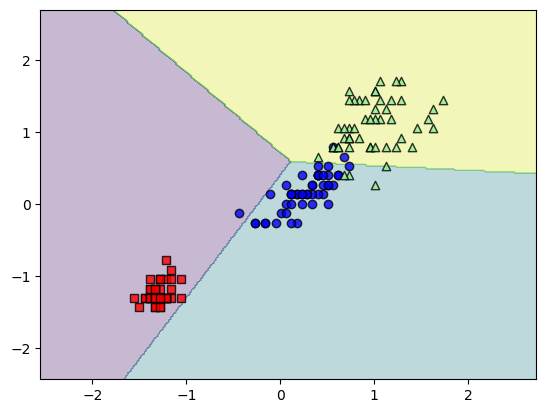

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]') # 꽃잎 길이
plt.ylabel('petal width [standardized]') # 꽃잎 너비
plt.legend(loc='upper left') # 범례 표시
plt.tight_layout()
plt.show()

# 로지스틱 회귀를 사용한 클래스 확률 모델링

퍼셉트론은 간단하고 좋은 모델이지만, 클래스가 선형적으로 구분되지 않을 때 수렴할 수 없다는 단점이 있다.

로지스틱 회귀는 간단하지만 선형 이진분류에 더 강력한 알고리즘이다.

## 로지스틱 회귀의 이해와 조건부 확률

로지스틱 회귀는 선형 회귀와 비슷하게 입력 특성에 대한 선형 함수를 만들고, 그 출력을 시그모이드 함수에 통과시켜 0과 1 사이의 값을 만든다.

> 다중 클래스를 위한 로지스틱 회귀
> 로지스틱 회귀는 이진 분류 알고리즘이지만, 다중 클래스 분류 알고리즘으로 일반화할 수 있다.

### 오즈비

오즈비는 하나의 이벤트가 다른 이벤트보다 발생할 확률이 얼마나 높은지를 나타내는 측정 방법이다.

$$
\text{odds ratio} = \frac{p}{(1-p)}
$$

P는 양성 샘플일 확률이다. 양성샘플은 좋은 것을 의미하지 않고 단지 예측하고자 하는 클래스를 의미한다.
예를 들어 특정 증상을 보이는 환자가 어떤 질병에 걸렸을 확률이다. 양성 샘플이 클래스 세이블 y=1인 샘플이고 증상을 특성 x로 생각할 수 있다.
따라서 확률 P를 특성이 x인 샘플이 클래스 1에 속할 조건부 확률 p: $p(y=1|x)$로 나타낼 수 있다.

오즈비에 로그함수를 취해 로짓(logit) 함수를 정의할 수 있다.
$$
\text{logit}(p) = \log \frac{p}{(1-p)}
$$

logit 함수는 0과 1 사이의 p를 받아 실수 범위 값으로 변환한다.

로지스틱모델에서는 가중치가 적용된 입력과 로그 오즈 사이에 선형 관계가 있다고 가정한다.

$$
logit(p) = w_1x_1 + ... + w_mx_m = \sum_{i=1}^m w_ix_i + b = w^Tx +b
$$

이 식은 로그 오즈와 최종 입력 사이에 선형 관계에 대한 가정을 나타내지만 실제 관심 대상은 샘플의 클래스 소속 확률인p이다.
logit 함수는 확률을 실수에 매핑하므로 이 함수의 역함수를 사용하여 실수 범위를 확률p에 대한 범위로 다시 매핑할 수 있다.

logit함수를 거꾸로 뒤집은 함수를 **로지스틱 시그모이드 함수(Logistic sigmoid function)**라고 한다. 함수 모양이 S자 형태로 간단히 시그모이드 함수라고도 한다.

$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

여기에서 z는 가중치와 입력(즉, 훈련 샘플의 특성)의 선형 조합으로 이루어진 최종 입력이다. z는 $z = w^Tx + b$로 나타낼 수 있다.

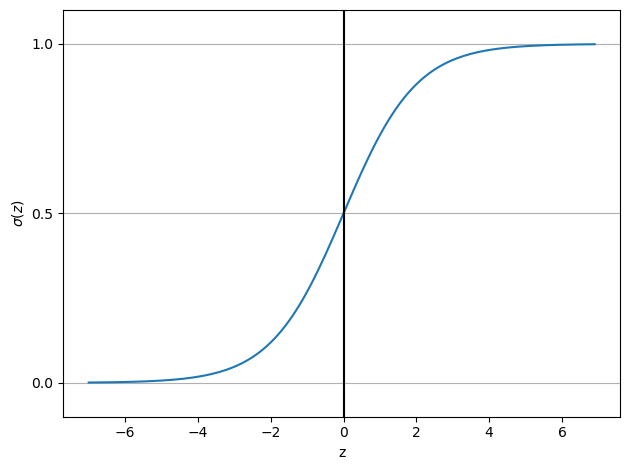

In [12]:
# 시그모이드 함수의 형태 (-7~7)

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k') # 세로 점선 추가
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.xlabel('z') # x축 레이블
plt.ylabel('$\sigma(z)$') # y축 레이블
plt.yticks([0.0, 0.5, 1.0]) # y축 눈금
ax = plt.gca() # 현재 축을 얻습니다.
ax.yaxis.grid(True) # y축의 그리드를 활성화합니다.
plt.tight_layout()
plt.show()


z가 무한대로 가면 (z->∞) e^-z가 매우 작아지기 때문에 $\sigma(z) $ 는 1에 가까워진다. 비슷하게 z->-∞로 가면 $\sigma(z)$는 0에 가까워진다.
따라서 z가 선형 함수로 증가하면 $\sigma(z)$는 0에서 1 사이의 값을 출력한다. 위의 그래프에서 볼 수 있듯이 z가 0일 때 $\sigma(z)$는 0.5이다.

가중치와 절편 파라미터 w와 b를 사용하여 특성 x에 대한 sigmoid 함수의 출력을 특정 샘플이 클래스 1에 속할 확률 $\sigma(z)=0.8$이라면 이 샘플은 Iris-versicolor 클래스에 속할 확률이 80%라는 뜻이다. 
이 샘플이 Iris-setosa일 확률은 $p(y=0|x;w,b)=1-p(y=1|x; w,b)$처럼 계산되어 20%이다.
$$
y={\begin{cases} 1    z{\geq 0.5 일때}\\0 &   {\text{otherwise}}\end{cases}}
$$


### 3.3.2 로지스틱 손실 함수의 가중치 학습

평균 제곱 오차 손실 함수
$$
L(w,b|x) = \Sigma_{i}^n \frac{1}{2}(\sigma(z^{(i)}) - y^{(i)})^2
$$

아달린 분류 모델에서 평균 제곱 오차 손실 함수를 최소화하는 파라미터를 학습한다. 

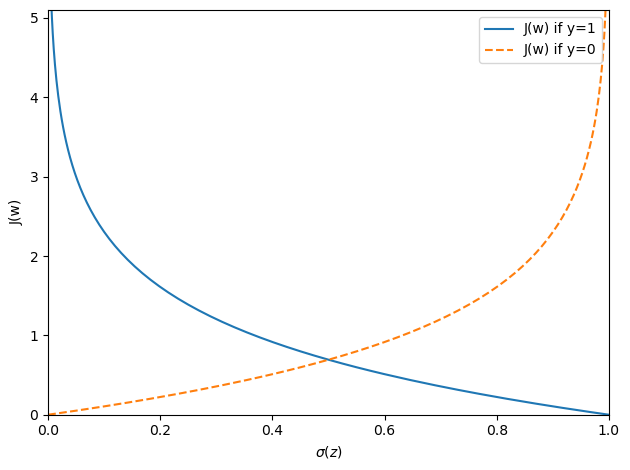

In [16]:
def loss_1(z):
    return - np.log(sigmoid(z))

def loss_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='J(w) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [20]:
class LogisticRegressionGD:
    """경사 하강법을 사용한 로지스틱 회기 분류기
    
    매개변수
    ------------
    eta: float
        학습률 (0.0과 1.0 사이)
    n_iter: int
        훈련 데이터셋 반복 횟수
    random_state: int
        가중치 무작위 초기화를 위한 난수 생성기 시드
        
    속성
    ------------
    w_: 1d-array
        학습된 가중치
    b_: 스칼라
        학습된 절편 유닛
    losses_: list
        각 에포크의 평균 제곱 오차 손실 함수 값
    """
    
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
        
    def fit(self, X, y):
        """훈련 데이터 학습
        
        매개변수
        ------------
        X: {array-like}, shape = [n_samples, n_features]
            n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y: array-like, shape = [n_samples]
            타깃값
            
        반환값
        ------------
        self: LogisticRegressionGD 객체
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.0)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output))
                    - ((1 - y).dot(np.log(1 - output))) / X.shape[0])
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다."""
        return np.where(self.activation(self.net_input(X)) > 0.5, 1, 0)

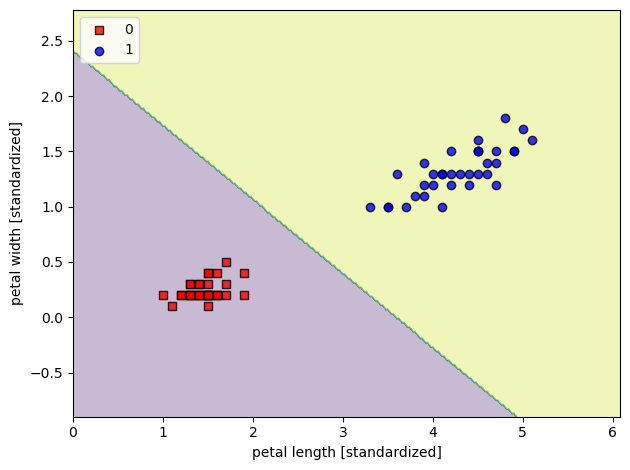

In [21]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('petal length [standardized]') # 꽃잎 길이
plt.ylabel('petal width [standardized]') # 꽃잎 너비
plt.legend(loc='upper left') # 범례 표시
plt.tight_layout()
plt.show()

### 사이킷런을 사용하여 로지스틱 회귀 모델 훈련



ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ''

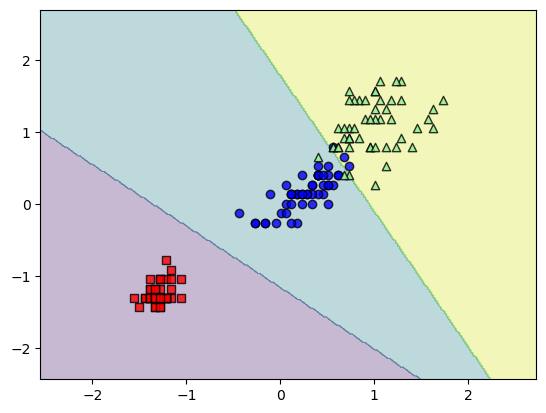

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]') # 꽃잎 길이
plt.ylabel('petal width [standardized]') # 꽃잎 너비
plt.legend(loc='upper left') # 범례 표시
plt.tight_layout()
plt.show()